# Clustering Project

### ✏ Created By Mohammad Al Jadallah
### 📣 Instagram, TikTok: developerx2

## About
    A simple project that use KMeans algorithm to do the clustering task based on data set from Kaggle.
    
#### 📌Methodology
    📍 KMeans model: Its find the distance between the center point(Unlabeled data point) and the other labeled data points then it's make labeling for the unknown data point according to the nearest one.
    
    📍 for clustering model we can not use a messures as accueacy_score because it is for classification not for clustering algo
    
    📍 for KMeans there is a messure like ARI: Adjusted Rand Index messure that calculate the similarity between two clusters the true label and the predicted one
    
    📍 Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets
    
#### 📌 About the data set
    👉 Credit Card dataset
    👉 This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
    Following is the Data Dictionary for Credit Card dataset :-
    

#### 📌 Following is the Data Dictionary for Credit Card dataset: 

<ul>
    <li>
CUSTID : Identification of Credit Card holder (Categorical)
        </li>
    <li>
BALANCE : Balance amount left in their account to make purchases (
</li>
    
<li>  
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
    </li>
    <li>
PURCHASES : Amount of purchases made from account
        </li>  
    <li>
ONEOFFPURCHASES : Maximum purchase amount done in one-go
        </li> 
<li>
INSTALLMENTSPURCHASES : Amount of purchase done in installment
</li>  
    <li>
CASHADVANCE : Cash in advance given by the user
    </li>
    <li>        
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
        </li>  
<li>
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
</li>
 <li>
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
</li>
    <li>
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
        </li>
    <li>
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
        </li>
    <li>
PURCHASESTRX : Numbe of purchase transactions made
        </li>
    <li>
CREDITLIMIT : Limit of Credit Card for user
        </li>
    <li>
PAYMENTS : Amount of Payment done by user
        </li>
    <li>
MINIMUM_PAYMENTS : Minimum amount of payments made by user
        </li>
    <li>
PRCFULLPAYMENT : Percent of full payment paid by user
        </li>
    <li>
TENURE : Tenure of credit card service for user
        </li>
</ul>

#### 📌 Dependencies
    📍 sklearn: pip install scikit-learn
    📍 pandas: pip install pandas
    📍 numpy: pip install numpy
    📍 seaborn: pip install seaborn
    📍 dataprep: pip install -U dataprep
    📍 pickle
    

## Importing Libraries

In [1]:
# for working with data, dataframes, and others
import pandas as pd
# for work with data and arrays and some methods if needed
import numpy as np
# for visualizing the data, result...
import seaborn as sea
# for visualizing data if needed
import matplotlib.pyplot as plt
# get the model
from sklearn.cluster import KMeans
# for clustering model we can not use a messures as accueacy_score because it is for classification not for clustering algo
# for KMneans there is a messure like ARI: Adjusted Rand Index messure that calculate the similarity between two clusters
# the true label and the predicted one
from sklearn.metrics import adjusted_rand_score 

## Data Preprocessing

In [2]:
# Read the data
df = pd.read_csv(r'CC GENERAL.csv')

In [3]:
# Show the data
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Shape of the data
sh = df.shape
F"Columns = {sh[0]}, rows = {sh[1]}"

'Columns = 8950, rows = 18'

In [6]:
# Checking the null values
sum_nans = df.isnull().sum().sum()
def check_nans(sum_nans):
    if sum_nans == 0:
        print("There are no null values...")
    else:
        print("There are null values | The summation of nans = %i" % sum_nans)
check_nans(sum_nans)

There are null values | The summation of nans = 314


In [7]:
# To find where is the null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# convert the name of columns to snake_case to work with columns easily
from dataprep.clean import clean_headers
cleaned_df = clean_headers(df)

Column Headers Cleaning Report:
	18 values cleaned (100.0%)


In [9]:
cleaned_df.head(0)

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


In [10]:
# The two columns have the nan values are (minimum_payments, credit_limit)
# - I will drop the row that contains the null value in the CREDIT_LIMIT column
# - I would not like to remove the 313 rows that contains the Null values in MINIMUM_PAYMENTS columns
# So I will replace the nan values by the mean

cp_df = cleaned_df.copy()  # make a copy from the original df
cp_df = cp_df.drop(axis=0, index=cp_df[cp_df['credit_limit'].isnull() == True].index[0])  # index used to get the index of the row

In [11]:
cp_df.isnull().sum()  # Removed

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          0
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [12]:
avg = cp_df['minimum_payments'].mean()

In [13]:
avg

864.3049429326078

In [14]:
# replace the nan values by the mean
cp_df.fillna(avg, axis=0, inplace=True)

In [15]:
sum_nans_cp_df = cp_df.isnull().sum().sum()
check_nans(sum_nans_cp_df)

There are no null values...


In [16]:
# drop the CUST_ID columns
cp_df.drop('cust_id', axis=1, inplace=True)

In [17]:
cp_df.head(1)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


## Data Exploration

In [18]:
# describe the data
cp_df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.304943,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot: >

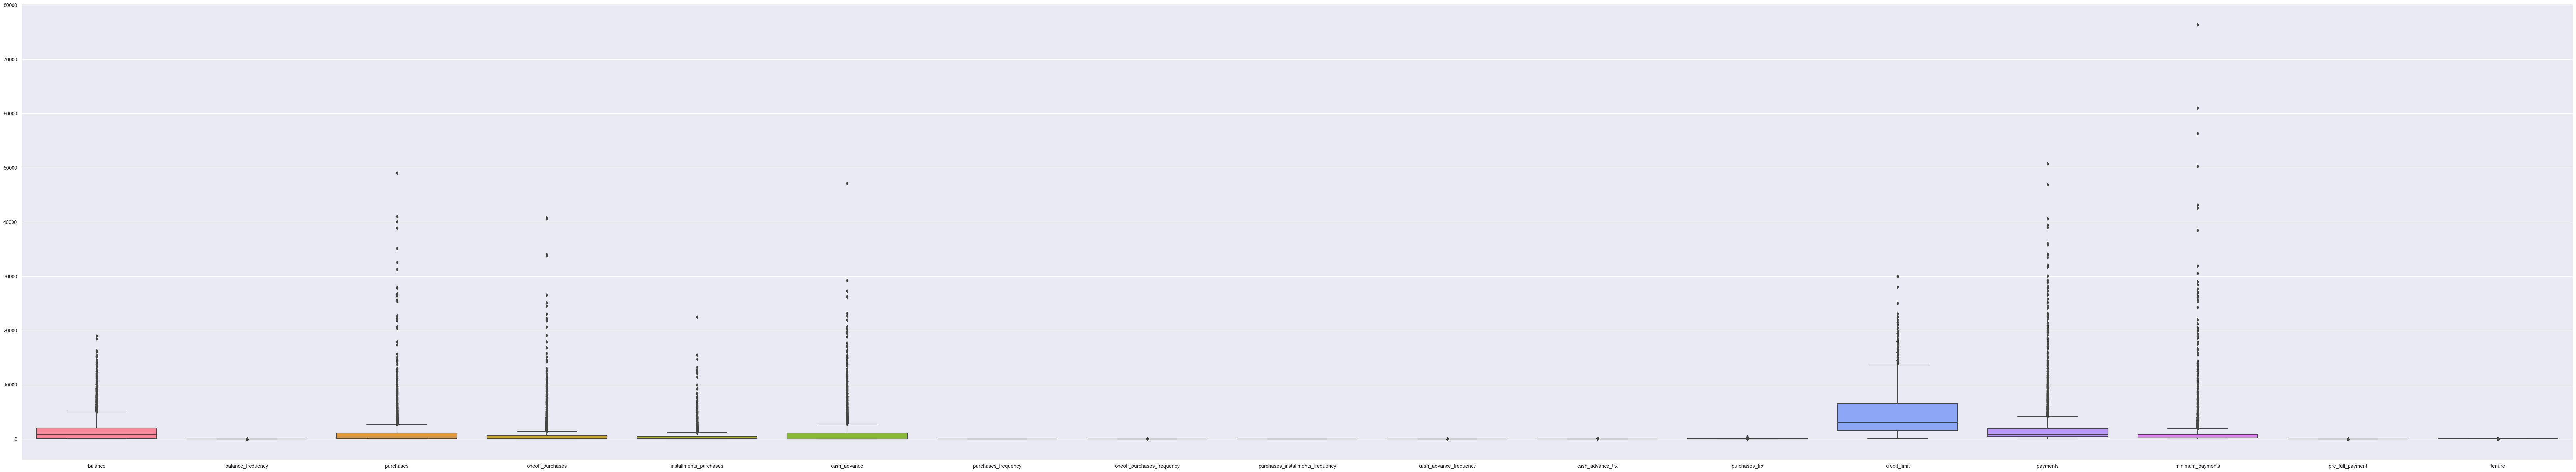

In [19]:
# Show the boxplot just for more understanding and I have no intent to remove the outliers right now
fig = plt.figure(figsize=(100, 18)) 
sea.set_theme(style='darkgrid')
sea.boxplot(cp_df, saturation=1)  # In the jupyter notebook just click two times on the image below to zoom 

In [20]:
corr = df.corr(numeric_only=True)
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


<AxesSubplot: >

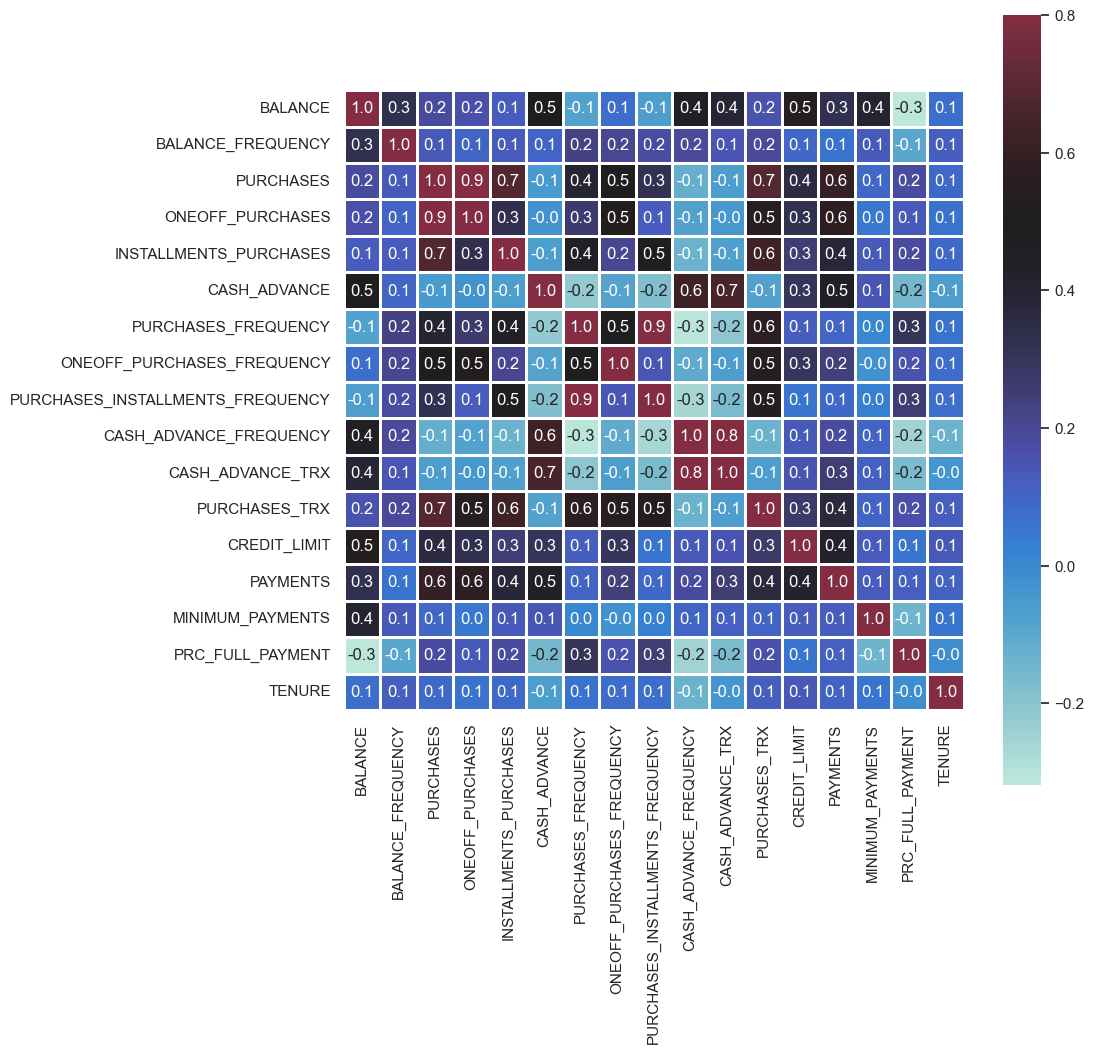

In [21]:
# heat map for showing the corrilation between the columns
plt.figure(figsize=(10, 10))
sea.heatmap(corr, annot=True, square=True, linewidth=1, center=0.5, vmax=0.8, fmt='.1f')

In [22]:
dup_val = cp_df.duplicated().sum()
"Is there any value duplicated? False" if dup_val == 0 else F"There are duplicated values | {dup_val}"

'Is there any value duplicated? False'

## Normalize the data

In [23]:
# RobustScaler method because it works good if there are outliers
from sklearn.preprocessing import RobustScaler

# Scaling the data
robust_scaler = RobustScaler()
df_scalered = pd.DataFrame(robust_scaler.fit_transform(cp_df), columns=cp_df.columns)
df_scalered

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.432387,-1.636364,-0.248596,-0.065763,0.013656,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431661,-0.282866,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.065763,-0.189907,5.784296,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138325,1.062376,1.555556,0.0
2,0.841881,0.000000,0.384615,1.272295,-0.189907,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154807,0.420558,0.000000,0.0
3,0.411728,-3.272727,1.062726,2.528425,-0.189907,0.184751,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564601,0.762367,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.038073,-0.189907,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117739,-0.131039,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.438828,0.000000,-0.065744,-0.065763,0.431281,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.350112,-0.413555,3.500004,-6.0
8945,-0.443662,0.000000,-0.057447,-0.065763,0.450229,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.382874,0.762367,0.000000,-6.0
8946,-0.441474,-1.500005,-0.202818,-0.065763,0.118212,0.000000,0.399999,-0.277777,0.666667,0.000000,0.00,-0.1250,-0.408163,-0.511063,-0.365198,1.750002,-6.0
8947,-0.446635,-1.500005,-0.337724,-0.065763,-0.189907,0.032821,-0.600000,-0.277777,-0.222223,0.750002,0.50,-0.4375,-0.510204,-0.529983,-0.403649,1.750002,-6.0


<AxesSubplot: >

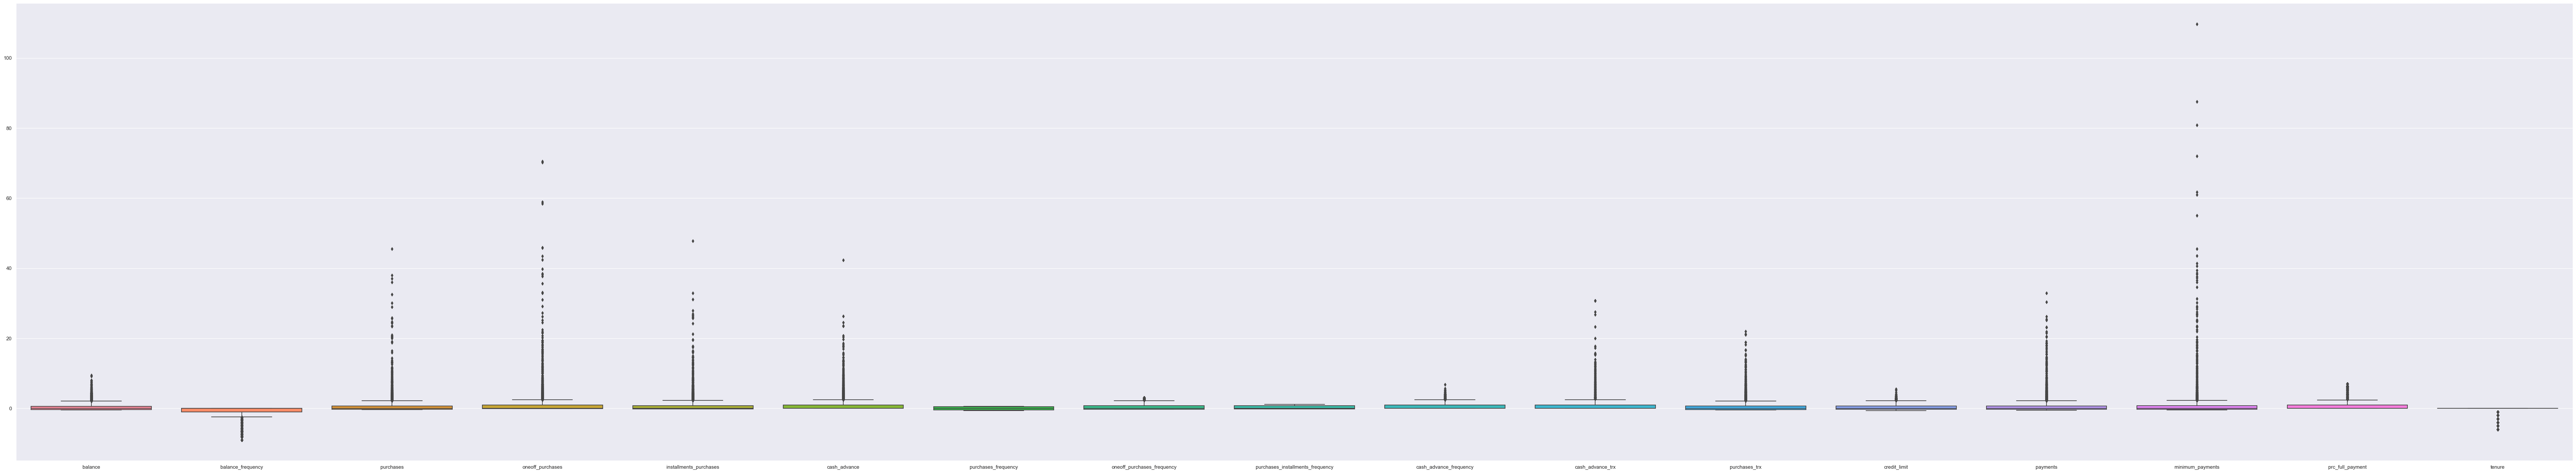

In [24]:
fig = plt.figure(figsize=(100, 18)) 
sea.set_theme(style='darkgrid')
sea.boxplot(df_scalered, saturation=1)  # In the jupyter notebook just click two times on the image below to zoom 

In [25]:
# Now I will handle the outliers
def check_outliers(dataf):
    copDf = dataf.copy()
    columns = copDf.columns
    for col in columns:
        Q1 = np.nanpercentile(copDf[col], 25)
        Q3 = np.nanpercentile(copDf[col], 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        copDf[col] = np.where(copDf[col] > upper, upper, copDf[col])
        copDf[col] = np.where(copDf[col] < lower, lower, copDf[col])
        
    return copDf

In [26]:
no_outer_df = check_outliers(df_scalered)
no_outer_df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.432387,-1.636364,-0.248596,-0.065763,0.013656,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431661,-0.282866,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.065763,-0.189907,2.500000,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138325,1.062376,1.555556,0.0
2,0.841881,0.000000,0.384615,1.272295,-0.189907,0.000000,0.600000,2.222223,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154807,0.420558,0.000000,0.0
3,0.411728,-2.500000,1.062726,2.434237,-0.189907,0.184751,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564601,0.762367,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.038073,-0.189907,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117739,-0.131039,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.438828,0.000000,-0.065744,-0.065763,0.431281,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.350112,-0.413555,2.500000,0.0
8945,-0.443662,0.000000,-0.057447,-0.065763,0.450229,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.382874,0.762367,0.000000,0.0
8946,-0.441474,-1.500005,-0.202818,-0.065763,0.118212,0.000000,0.399999,-0.277777,0.666667,0.000000,0.00,-0.1250,-0.408163,-0.511063,-0.365198,1.750002,0.0
8947,-0.446635,-1.500005,-0.337724,-0.065763,-0.189907,0.032821,-0.600000,-0.277777,-0.222223,0.750002,0.50,-0.4375,-0.510204,-0.529983,-0.403649,1.750002,0.0


<AxesSubplot: >

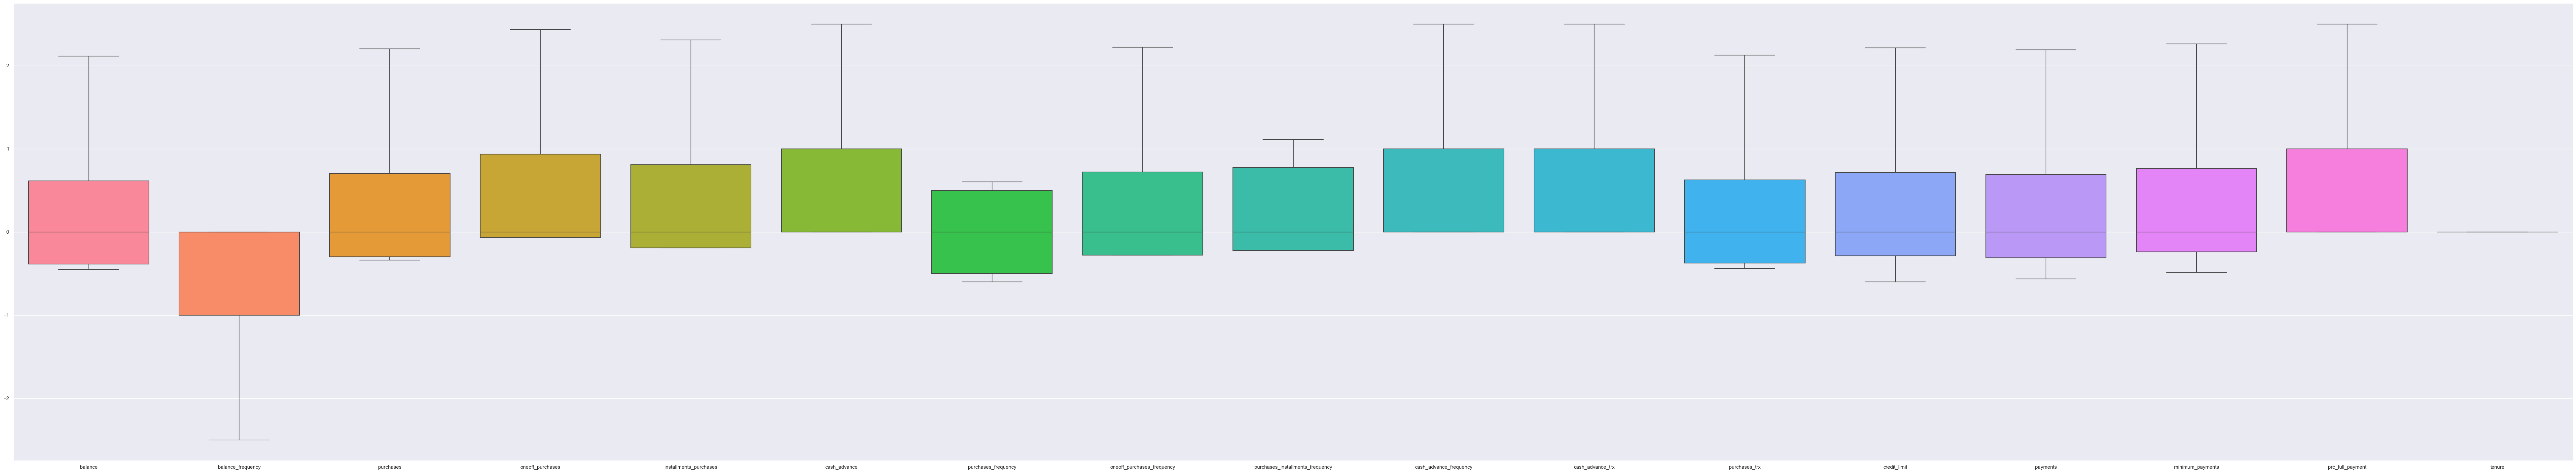

In [27]:
fig = plt.figure(figsize=(100, 18)) 
sea.set_theme(style='darkgrid')
sea.boxplot(no_outer_df, saturation=1)  # In the jupyter notebook just click two times on the image below to zoom 

In [28]:
# Now I will the 17 columns I have in 3 cloumns this will reduce the features and make the fitting better
from sklearn.decomposition import PCA  # It used to make a components that contains the columns

In [29]:
# Initialize the Principal Component Analysis (PCA)
pca = PCA(n_components=3)

In [30]:
# Fit the model with X and apply the dimensionality reduction on X.
fitted_pca_d = pca.fit_transform(no_outer_df)

In [31]:
fitted_pca_d

array([[-1.1860142 , -2.01570916, -0.32310493],
       [-1.57321497,  1.65692473,  1.83660508],
       [ 1.00465699,  0.26691038, -1.18185733],
       ...,
       [-0.37221149, -2.37937908,  0.43886877],
       [-1.30621567, -2.04266398,  0.83388529],
       [ 0.66394151, -0.67979609,  0.72569068]])

In [32]:
# mak a dataframe
fpca_df = pd.DataFrame(fitted_pca_d, columns=['component_1', 'component_2', 'component_3'])

In [33]:
fpca_df.head()

,component_1,component_2,component_3
0,-1.186014,-2.015709,-0.323105
1,-1.573215,1.656925,1.836605
2,1.004657,0.266910,-1.181857
3,-0.017792,-0.442689,0.397034
4,-1.066568,-1.207819,-1.188062


In [34]:
# There is a method that is used to obtain the variance ratio of the above components
variances = pca.explained_variance_ratio_
print(variances, F"| The summation of variances ration is {sum(variances)}")

[0.30720366 0.26431349 0.10287929] | The summation of variances ration is 0.6743964492151759


## Modeling

In [35]:
# Create an object
k_means = KMeans(n_clusters=5, random_state=1, n_init='auto')

In [36]:
k_means.fit(fpca_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [37]:
k_means.labels_

array([2, 4, 3, ..., 2, 2, 3])

In [38]:
# 5 clusters -> f rows | 3 components -> 3 columns
# "مركز الكتلة" هو المتوسط الحسابي لجميع النقاط التي تنتمي إلى الكتلة. كل نقطة أقرب إلى مركز الكتلة الخاص بها من مراكز الكتلة الأخرى.
# The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
# Each point is closer to its own cluster center than to other cluster centers.
k_means.cluster_centers_

array([[ 3.3681555 ,  1.48883926,  0.22537933],
       [-0.91873957, -0.41828262, -0.93415468],
       [-0.41282188, -1.80852161,  0.79284979],
       [ 1.50502591, -0.33303674, -0.34793969],
       [-1.6662577 ,  2.16165314,  0.54811063]])

In [39]:
# Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid
# , squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).
# For better clustering, the inertia value should be minimum.
# In contrast, if the inertia value is high, that means data points in the cluster are not similar to each other.
# This indicates a simple concept that for a given datapoint intra-cluster distance should always be less than inter-cluster distance.
k_means.inertia_

19060.6349967483

## Evaluation

In [40]:
# Evaluation
pred = k_means.predict(fpca_df)
ARI = adjusted_rand_score(labels_pred=pred, labels_true=k_means.labels_)

In [41]:
print("The true labels =", k_means.labels_, "The predicted labels = ", pred)

The true labels = [2 4 3 ... 2 2 3] The predicted labels =  [2 4 3 ... 2 2 3]


In [42]:
print("The Adjusted Rand Score \"The score\" is: " + str(ARI))

The Adjusted Rand Score "The score" is: 1.0


In [43]:
# Create the last and new dataframe with adding the class "labels" to the dataframe
nldf = no_outer_df.copy()
nldf['class'] = k_means.labels_
nldf

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,class
0,-0.432387,-1.636364,-0.248596,-0.065763,0.013656,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431661,-0.282866,0.000000,0.0,2
1,1.209127,-0.818182,-0.337724,-0.065763,-0.189907,2.500000,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138325,1.062376,1.555556,0.0,4
2,0.841881,0.000000,0.384615,1.272295,-0.189907,0.000000,0.600000,2.222223,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154807,0.420558,0.000000,0.0,3
3,0.411728,-2.500000,1.062726,2.434237,-0.189907,0.184751,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564601,0.762367,0.000000,0.0,2
4,-0.029058,0.000000,-0.322776,-0.038073,-0.189907,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117739,-0.131039,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.438828,0.000000,-0.065744,-0.065763,0.431281,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.350112,-0.413555,2.500000,0.0,2
8945,-0.443662,0.000000,-0.057447,-0.065763,0.450229,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.382874,0.762367,0.000000,0.0,1
8946,-0.441474,-1.500005,-0.202818,-0.065763,0.118212,0.000000,0.399999,-0.277777,0.666667,0.000000,0.00,-0.1250,-0.408163,-0.511063,-0.365198,1.750002,0.0,2
8947,-0.446635,-1.500005,-0.337724,-0.065763,-0.189907,0.032821,-0.600000,-0.277777,-0.222223,0.750002,0.50,-0.4375,-0.510204,-0.529983,-0.403649,1.750002,0.0,2


## Visulaization

In [44]:
count_labels = nldf['class'].value_counts().to_list()
print(count_labels, '\n')
print(nldf['class'].value_counts())

[2462, 2094, 1727, 1587, 1079] 

1    2462
2    2094
4    1727
3    1587
0    1079
Name: class, dtype: int64


<AxesSubplot: xlabel='Class', ylabel='Count'>

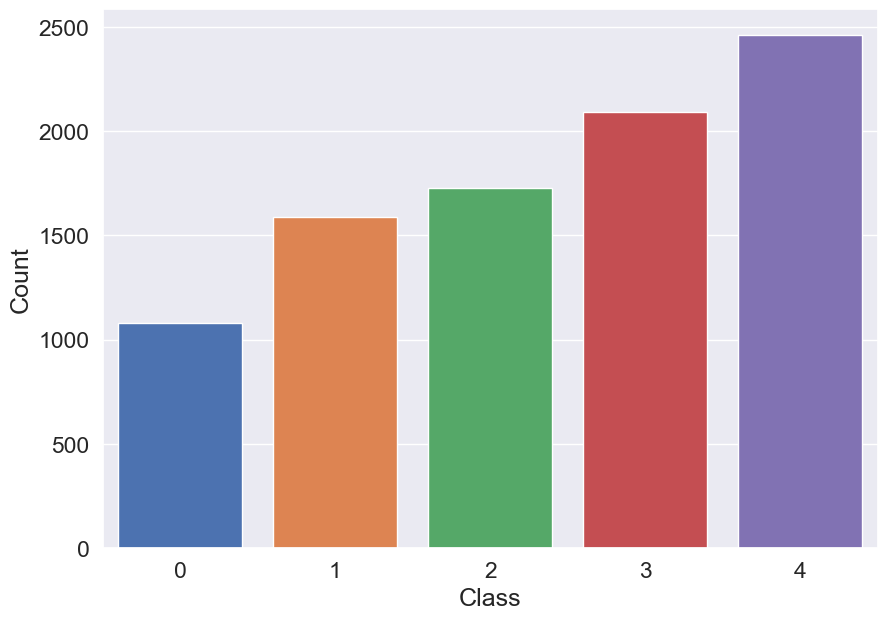

In [45]:
# Visualize the labels
sea.set(font_scale=1.5)
plt.figure(figsize=(10, 7))
plt.xlabel('Class')
plt.ylabel('Count')
sea.barplot(x=sorted(nldf['class'].unique(), reverse=True), y=count_labels,errorbar=('ci', False), saturation=1)

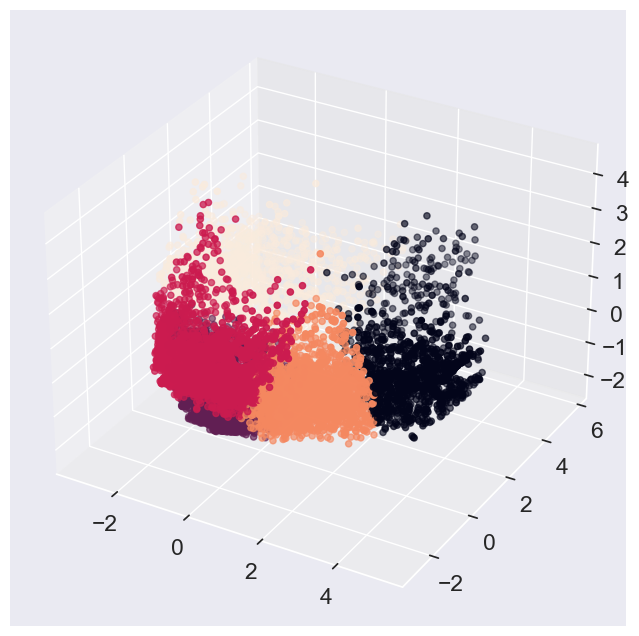

In [46]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
ax.scatter(fpca_df['component_1'], fpca_df['component_2'], fpca_df['component_3'], c=k_means.labels_)

## Pickiling the model

In [47]:
# pickiling the model
import pickle as pk

def pikiling(name_file: str, mode_: str, close=True):
    # Open the file
    with open(name_file, mode_) as f:
        # Write the file
        pk.dump(k_means, f)
        if close:
            f.close()        

In [48]:
# name of the file, mode to use "wb"
pikiling('model.pkl', 'wb')

In [49]:
# Reading the file
with open('model.pkl', 'rb') as pkf:
    cluster_model = pk.load(pkf)
    

In [50]:
# testing
print(
    f'algorithm=> {cluster_model.algorithm}',
    f'feature names=> {cluster_model.feature_names_in_}'
     )

algorithm=> lloyd feature names=> ['component_1' 'component_2' 'component_3']


# Transfer the last dataframe after cllustering to csv file

In [51]:
nldf.to_csv('clustered_data.csv', index=False)